# Graph basics

- What is a graph?
- Applications
- Creation of an undirected graph from a python dictionary.

In [1]:
import os
import sys
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from data_loader import LoadNetworkX
from data_visual import VisualizeNetworkX

## What is a graph?

- Formally, a graph is described as a way of encoding pairwise relationships among a set of objects: it consists of a collection $ V $ of vertices (also called nodes, $ N $) and a collection $ E $ of edges (also called links, $ L $), each of which joins two of the nodes [1]. 

$$

G = (V, E)

$$

- Graphs can be directed or undirected.

In [2]:
# Simple graph using dictionary (also called an adjacency list)
undirected_graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'E']
}

# Print the graph
for node, neighbors in undirected_graph.items():
    print(f"{node} -> {neighbors}")

A -> ['B', 'C']
B -> ['A', 'D', 'E']
C -> ['A', 'F']
D -> ['B', 'E']
E -> ['B', 'D', 'F']
F -> ['C', 'E']


In [3]:
nx_graph_class = LoadNetworkX()
nx_graph_visual = VisualizeNetworkX()

In [4]:
nx_graph = nx_graph_class.dict_to_graph(undirected_graph)

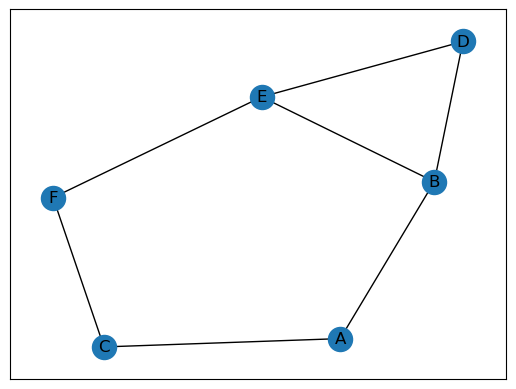

In [5]:
nx_graph_visual.visualize(nx_graph)

# References

1. BOOK: Algorithm Design by Kleinberg, Jon and Tardos